###### NOTE: Run in anaconda venv 'tensorflow'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [44]:
tf.__version__

'2.9.1'

##### Load the mnist digit database

In [5]:
mnist = tf.keras.datasets.mnist

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

##### Explore what the data contains

In [36]:
X_train[:1], y_train[:1], X_test[:1], y_test[:1]

(array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
     

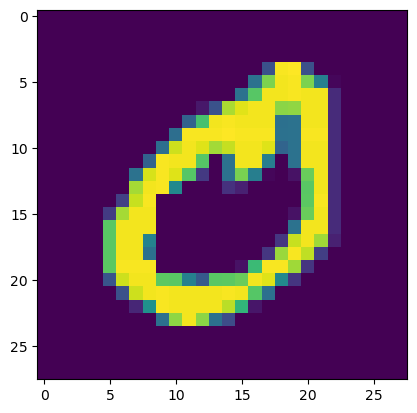

In [37]:
plt.imshow(X_train[21])

In [38]:
y_train[21]

0

In [24]:
X_train[0][20]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
       253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

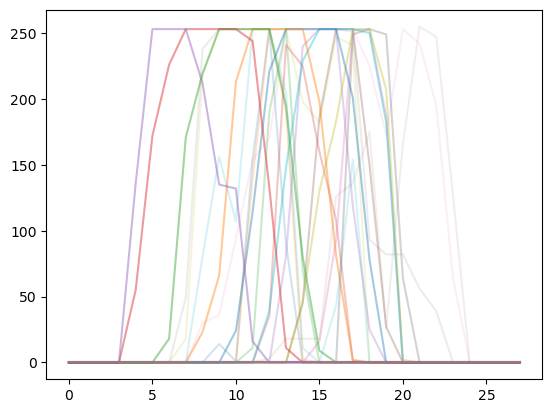

In [34]:
for i, img in enumerate(X_train[0]):
    plt.plot(img, alpha = (i*(.02)))

Normalize to between 0 and 1, floating point

In [39]:
X_train = X_train/255.0
X_test = X_test/255.0

In [42]:
X_train.mean()

0.1306604762738429

In [43]:
X_train.shape

(60000, 28, 28)

##### Build a model

In [46]:
# Create the basic forward propogation framework of the model, basic is sequential
model = tf.keras.models.Sequential()

2022-10-13 08:08:28.079231: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [48]:
# First create a flattened input layer - simplifies the input to a vector array vs multi-dimensional tensor
model.add(tf.keras.layers.Flatten())

In [49]:
# Dense layers is the default for a NN, where first arg is the number of neurons in layer
# Trial 1 = 3 layers of small numbers of neurons
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(12, activation = 'relu'))
model.add(tf.keras.layers.Dense(12, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [54]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [55]:
model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 1s 600us/step - loss: 0.5122 - accuracy: 0.8428
Epoch 2/3
1875/1875 [==============================] - 1s 589us/step - loss: 0.2828 - accuracy: 0.9172
Epoch 3/3
1875/1875 [==============================] - 1s 591us/step - loss: 0.2445 - accuracy: 0.9281


In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 464us/step - loss: 0.2273 - accuracy: 0.9327


[0.22732701897621155, 0.932699978351593]

In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(80, activation= 'relu'))
model.add(tf.keras.layers.Dense(80, activation= 'relu'))
model.add(tf.keras.layers.Dense(40, activation = 'relu'))
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 901us/step - loss: 0.2863 - accuracy: 0.9123
Epoch 2/10
1875/1875 [==============================] - 2s 893us/step - loss: 0.1194 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 2s 898us/step - loss: 0.0885 - accuracy: 0.9724
Epoch 4/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.0710 - accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.0599 - accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.0502 - accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 2s 893us/step - loss: 0.0446 - accuracy: 0.9856
Epoch 8/10
1875/1875 [==============================] - 2s 895us/step - loss: 0.0367 - accuracy: 0.9883
Epoch 9/10
1875/1875 [==============================] - 2s 897us/step - loss: 0.0336 - accuracy: 0.9892
Epoch 10/10
1875/1875 [==============================] - 2s 892u

In [59]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(160, activation= 'relu'))
model.add(tf.keras.layers.Dense(80, activation= 'relu'))
model.add(tf.keras.layers.Dense(40, activation = 'relu'))
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2725 - accuracy: 0.9188
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1088 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0769 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0590 - accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0467 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0398 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0344 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0298 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0270 - accuracy: 0.9913
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.023

In [60]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 655us/step - loss: 0.0918 - accuracy: 0.9774


[0.09182712435722351, 0.977400004863739]

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(80, activation= 'relu'))
model.add(tf.keras.layers.Dense(40, activation = 'relu'))
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 831us/step - loss: 1.7652 - accuracy: 0.5161
Epoch 2/10
1875/1875 [==============================] - 2s 821us/step - loss: 0.6139 - accuracy: 0.8196
Epoch 3/10
1875/1875 [==============================] - 2s 825us/step - loss: 0.3563 - accuracy: 0.9153
Epoch 4/10
1875/1875 [==============================] - 2s 857us/step - loss: 0.2365 - accuracy: 0.9416
Epoch 5/10
1875/1875 [==============================] - 2s 822us/step - loss: 0.1783 - accuracy: 0.9536
Epoch 6/10
1875/1875 [==============================] - 2s 827us/step - loss: 0.1455 - accuracy: 0.9614
Epoch 7/10
1875/1875 [==============================] - 2s 853us/step - loss: 0.1270 - accuracy: 0.9662
Epoch 8/10
1875/1875 [==============================] - 2s 825us/step - loss: 0.1108 - accuracy: 0.9700
Epoch 9/10
1875/1875 [==============================] - 2s 835us/step - loss: 0.0990 - accuracy: 0.9727
Epoch 10/10
1875/1875 [==============================] - 2s 827u